In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd
data = pd.read_csv('train.csv', index_col=2)  # set the data as index column (time series)
print type(data.index.values[0])
data.index = pd.to_datetime(data.index)  # convert date to datetime index
print type(data.index.values[0])
data['StateHoliday'].replace(0, "0",inplace=True)
print type(data)
data.head()

<type 'str'>
<type 'numpy.datetime64'>
<class 'pandas.core.frame.DataFrame'>


/home/khalil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [2]:
date_vs_sales = data[['Sales']]  # we need to put [[]] to conserve the column name (if not [] we lose it) 

-----
           StateHoliday
2013-01-07            a
2013-01-14            0
2013-01-21            0
2013-01-28            0
2013-02-04            0


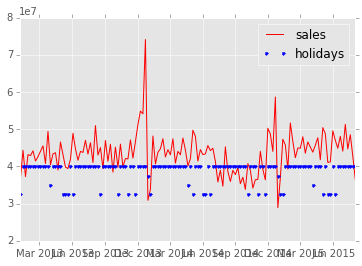

In [3]:
# show state holidays in function of date

holiday_filtred = data[['StateHoliday']]

def custom_resampler(array_like):
    if any(array_like=="c"):
        return "c"
    if any(array_like=="a"):
        return "a"
    if any(array_like=="b"):
        return "b"
    else:
        return array_like.value_counts().idxmax()
    
holiday_aggregated = holiday_filtred.resample('W-Mon', how=custom_resampler)
print '-----'
print holiday_aggregated.head()

# merge between holiday aggregated and sales aggregated
sales_aggregated = data[['Sales']].resample('W-Mon',how='sum')
sales_holiday_aggregated = holiday_aggregated.join(sales_aggregated, how='inner')
sales_holiday_aggregated = sales_holiday_aggregated.replace({'StateHoliday' : { 'a' : 32500000, 'b' : 35000000, 'c' : 37500000,'0': 40000000 }}) # change letters to values to plot them
plt.plot_date(sales_holiday_aggregated.index, sales_holiday_aggregated.Sales,fmt="r-",label='sales')
plt.plot_date(sales_holiday_aggregated.index, sales_holiday_aggregated.StateHoliday,fmt="b.",label='holidays')
plt.legend()
plt.show()
#sales_holiday_aggregated.plot()


In [4]:
# join  store and train set

def convert_month_to_number(promo_intervall):
    #pdb.set_trace()
    splited_months = promo_intervall.split(',')
    
    promo_number = [w.replace('Jan', '1').replace('Apr','4').replace('Feb', '2').replace('Mar','3').replace('May','5').replace('Jun','6').replace('Jul','7').replace('Aug','8').replace('Sept','9').replace('Oct','10').replace('Nov','11').replace('Dec','12') for w in splited_months]
    
    
    #pdb.set_trace()
    return promo_number

import pdb
data = pd.read_csv('train.csv')
store_data = pd.read_csv('store.csv')
joined_data = data.merge(store_data, on='Store')
joined_data = joined_data.set_index(['Date'])
joined_data.index = pd.to_datetime(joined_data.index)
joined_data['promo_indicator'] = 0
joined_data.tail(20)
print type(joined_data)
promo2_obs = joined_data[joined_data['Promo2']==1]
#promo2_obs = promo2_obs.set_index(['Date'])
promo2_obs.index = pd.to_datetime(promo2_obs.index)

joined_data.head(10)


#joined_data = data.join(store_data, on='Store',how='inner')

<class 'pandas.core.frame.DataFrame'>


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,promo_indicator
2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-30,1,4,5020,546,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-29,1,3,4782,523,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-28,1,2,5011,560,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-27,1,1,6102,612,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-26,1,7,0,0,0,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-25,1,6,4364,500,1,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-24,1,5,3706,459,1,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-23,1,4,3769,503,1,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-22,1,3,3464,463,1,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0


In [5]:
#promo2 indicator

import pdb
import numpy as np
ObsvDate = joined_data.index
year =pd.DataFrame(pd.DatetimeIndex(ObsvDate).year)
month=pd.DataFrame(pd.DatetimeIndex(ObsvDate).month)
day=pd.DataFrame(pd.DatetimeIndex(ObsvDate).day)
print type(month)

joined_data['day_extracted'] = pd.DatetimeIndex(ObsvDate).day
joined_data['month_extracted'] = pd.DatetimeIndex(ObsvDate).month
joined_data['year_extracted'] = pd.DatetimeIndex(ObsvDate).year
dates = joined_data.index.date #.isocalendar()
print dates[0]
week_number = [ [w.strftime("%W"),w.strftime("%B")] for w in dates]
week_number = np.array(week_number)
joined_data['week_number_extracted'] = week_number[:,0]
joined_data['month_name_extracted'] = week_number[:,1]
MyMap = {'January': 'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr', 'May': 'May', 'June': 'Jun', 'July': 'Jul', 'August': 'Aug', 'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dec'}
joined_data['Months']= pd.DataFrame(joined_data['month_name_extracted']).applymap(MyMap.get)
joined_data['isin'] = joined_data.apply(lambda row: str(row['Months']) in str(row['PromoInterval']),axis=1)

#joined_data.loc[joined_data['Promo2']==1 & joined_data['week_number_extracted']>=joined_data['CompetitionOpenSinceYear'],'promo2_indicator']=30
#joined_data.loc[(joined_data['Promo2']==1) & (joined_data['year_extracted']>joined_data['CompetitionOpenSinceYear']) & (joined_data['isin']== True) | (joined_data['Promo2']==1) & (joined_data['year_extracted']==joined_data['CompetitionOpenSinceYear']) & (joined_data['isin'] == True) & (joined_data['week_number_extracted'] > joined_data['Promo2SinceWeek'] ),'promo2_indicator' ]= 1
joined_data.loc[(((joined_data['Promo2']==1) & (joined_data['year_extracted']>joined_data['month_extracted']) & (joined_data['isin']==True ))  | ((joined_data['Promo2']==1) & (joined_data['year_extracted']==joined_data['CompetitionOpenSinceYear'])  & (joined_data['week_number_extracted'] >= joined_data['Promo2SinceWeek'] ) & (joined_data['isin']==True)) )| (joined_data['Promo']==1),'promo_indicator' ]= 1
joined_data.tail()

<class 'pandas.core.frame.DataFrame'>
2015-07-31


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,promo_indicator,day_extracted,month_extracted,year_extracted,week_number_extracted,month_name_extracted,Months,isin
2013-01-05,1115,6,4771,339,1,0,0,1,d,c,...,2012,"3,6,9,12",0,5,1,2013,00,January,Jan,False
2013-01-04,1115,5,4540,326,1,0,0,1,d,c,...,2012,"3,6,9,12",0,4,1,2013,00,January,Jan,False
2013-01-03,1115,4,4297,300,1,0,0,1,d,c,...,2012,"3,6,9,12",0,3,1,2013,00,January,Jan,False
2013-01-02,1115,3,3697,305,1,0,0,1,d,c,...,2012,"3,6,9,12",0,2,1,2013,00,January,Jan,False
2013-01-01,1115,2,0,0,0,0,a,1,d,c,...,2012,"3,6,9,12",0,1,1,2013,00,January,Jan,False


the week aggregation is defined by the aggregation of observations starting from the week before the displayed week until the displayed week

In [6]:
selected_features = joined_data[['DayOfWeek','month_extracted','Store','SchoolHoliday','StateHoliday','promo_indicator','StoreType','week_number_extracted']]
selected_features.tail()

,DayOfWeek,month_extracted,Store,SchoolHoliday,StateHoliday,promo_indicator,StoreType,week_number_extracted
2013-01-05,6,1,1115,1,0,0,d,00
2013-01-04,5,1,1115,1,0,0,d,00
2013-01-03,4,1,1115,1,0,0,d,00
2013-01-02,3,1,1115,1,0,0,d,00
2013-01-01,2,1,1115,1,a,0,d,00


In [7]:
# forecast generation
test_data = pd.read_csv('test.csv', index_col=0)  # set the data as index column (time series)
#test_data.index = pd.to_datetime(test_data.index)  # convert date to datetime index
test_data['StateHoliday'].replace(0, "0",inplace=True)
test_data = test_data.merge(store_data, on='Store')
test_data.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-09-17,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN
1,1,3,2015-09-16,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN
2,1,2,2015-09-15,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN
3,1,1,2015-09-14,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN
4,1,7,2015-09-13,0,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN


In [8]:
# extract day of week and month of year
ObsvDate = test_data.Date.values

splitted_date = [ [int(pd.to_datetime(w).strftime("%W")),int(pd.to_datetime(w).strftime("%d")),int(pd.to_datetime(w).strftime("%m"))] for w in ObsvDate]
#splitted_date = np.reshape(splitted_date,41088,3)
splitted_date = np.array(splitted_date)

#test_data['day_extracted'] = splitted_date[:,1]
test_data['month_extracted'] = splitted_date[:,2]
test_data['week_number_extracted'] = splitted_date[:,0]
test_data.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month_extracted,week_number_extracted
0,1,4,2015-09-17,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,9,37
1,1,3,2015-09-16,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,9,37
2,1,2,2015-09-15,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,9,37
3,1,1,2015-09-14,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,9,37
4,1,7,2015-09-13,0,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,9,36


In [9]:
useful_data_test = test_data[['DayOfWeek','month_extracted','StateHoliday','StoreType','Promo','SchoolHoliday','week_number_extracted']]
useful_data_test.rename(columns={'Promo': 'promo_indicator'}, inplace=True)
useful_data_train = joined_data[['DayOfWeek','month_extracted','StateHoliday','StoreType','promo_indicator','SchoolHoliday','week_number_extracted']] 
useful_data = useful_data_train.append(useful_data_test)
useful_data['week_number_extracted']=useful_data.week_number_extracted.map(int)
print useful_data_test.shape
print useful_data_train.shape
print useful_data.shape





(41088, 7)
(1017209, 7)
(1058297, 7)


/home/khalil/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [14]:
import numpy as np
import numpy
discretized_day_of_week = (useful_data.DayOfWeek.values[:,numpy.newaxis] == useful_data.DayOfWeek.unique()).astype(int)[0:1017209,:]
discretized_month_of_year = (useful_data.month_extracted.values[:,numpy.newaxis] == useful_data.month_extracted.unique()).astype(int)[0:1017209,:]
discretized_StateHoliday = (useful_data.StateHoliday.values[:,numpy.newaxis] == useful_data.StateHoliday.unique()).astype(int)[0:1017209,:]
discretized_StoreType = (useful_data.StoreType.values[:,numpy.newaxis] == useful_data.StoreType.unique()).astype(int)[0:1017209,:]
#discretized_WeekNumber = (useful_data.week_number_extracted.values[:,numpy.newaxis] == useful_data.week_number_extracted.unique()).astype(int)[0:1017209,:]
#X = np.concatenate((discretized_day_of_week, discretized_month_of_year,discretized_StateHoliday,discretized_StoreType,joined_data[['promo2_indicator']].values,joined_data[['SchoolHoliday']].values), axis=1)
X = np.concatenate((discretized_day_of_week,discretized_month_of_year,discretized_StateHoliday,discretized_StoreType,useful_data[['promo_indicator']].values[0:1017209,:],useful_data[['SchoolHoliday']].values[0:1017209,:]), axis=1)
y = joined_data[['Sales']].values[0:1017209,:]

print 'train set extraction'
print discretized_day_of_week.shape
print discretized_month_of_year.shape
print discretized_StateHoliday.shape
print discretized_StoreType.shape
#print discretized_WeekNumber.shape
print X.shape
print 'test set extraction'

discretized_day_of_week_test = (useful_data.DayOfWeek.values[:,numpy.newaxis] == useful_data.DayOfWeek.unique()).astype(int)[1017209:,:]
discretized_month_of_year_test = (useful_data.month_extracted.values[:,numpy.newaxis] == useful_data.month_extracted.unique()).astype(int)[1017209:,:]
#discretized_Store = (joined_data.Store.values[:,numpy.newaxis] == joined_data.Store.unique()).astype(int)
#discretized_School_holiday = (joined_data.SchoolHoliday.values[:,numpy.newaxis] == joined_data.SchoolHoliday.unique()).astype(int)
discretized_StateHoliday_test = (useful_data.StateHoliday.values[:,numpy.newaxis] == useful_data.StateHoliday.unique()).astype(int)[1017209:,:]
discretized_StoreType_test = (useful_data.StoreType.values[:,numpy.newaxis] == useful_data.StoreType.unique()).astype(int)[1017209:,:]
#discretized_WeekNumber_test = (useful_data.week_number_extracted.values[:,numpy.newaxis] == useful_data.week_number_extracted.unique()).astype(int)[1017209:,:]

print discretized_day_of_week_test.shape
print discretized_month_of_year_test.shape
print discretized_StateHoliday_test.shape
print discretized_StoreType_test.shape
print useful_data[['promo_indicator']].values[1017209:,:].shape
print useful_data[['SchoolHoliday']].values[1017209:,:].shape
#print discretized_WeekNumber_test.shape
X_test = np.concatenate((discretized_day_of_week_test, discretized_month_of_year_test,discretized_StateHoliday_test,discretized_StoreType_test,useful_data[['promo_indicator']].values[1017209:,:],useful_data[['SchoolHoliday']].values[1017209:,:]), axis=1)

train set extraction
(1017209, 7)
(1017209, 12)
(1017209, 5)
(1017209, 4)
(1017209, 30)
test set extraction
(41088, 7)
(41088, 12)
(41088, 5)
(41088, 4)
(41088, 1)
(41088, 1)


In [11]:
# coefficients generation

from sklearn import linear_model , preprocessing
import statsmodels.api as sm
from numpy import linalg as LA

#X_scaled = sm.add_constant(X_scaled)
linear = linear_model.LinearRegression(fit_intercept=True)
linear.fit(X,y)  # coefficients generation
y_hat = linear.predict(X)

joined_data['estimate']= y_hat
fitting_dataframe = joined_data[['Sales','estimate']]
fitting_dataframe.head()

,Sales,estimate
2015-07-31,5263,8603.515625
2015-07-30,5020,8300.437500
2015-07-29,4782,8243.242188
2015-07-28,5011,8552.531250
2015-07-27,6102,9590.820312


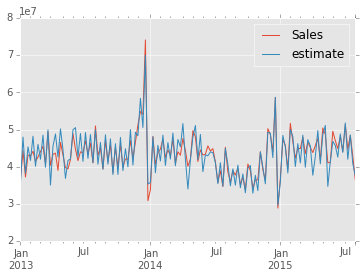

In [12]:
aggregated = fitting_dataframe[['Sales','estimate']].resample('W-Mon',how='sum')
aggregated.plot()

In [18]:
from sklearn.cross_validation import LeaveOneOut
from sklearn.cross_validation import KFold
from sklearn.cross_validation import Bootstrap
from sklearn.metrics import mean_squared_error

In [19]:
#K-Fold Cross Validation

cv_errors = []
kfold = KFold(len(X), n_folds=10)
mses = []
for train, test in kfold:
      # each model is cross validated 10 times
        Xtrain, ytrain, Xtest, ytest = X[train], y[train], X[test], y[test]   
        linear = linear_model.LinearRegression(fit_intercept=True)
        linear.fit(Xtrain,ytrain)  # coefficients generation
        y_hat = linear.predict(Xtest)
        mses.append(mean_squared_error(y_hat, ytest))
cv_errors.append(np.mean(mses))


In [20]:
#Bootstrup validation

bootsrap_errors = []
n = len(X)
bs = Bootstrap(n, train_size=int(0.9*n), test_size=int(0.1*n), n_iter=10, random_state=0)
mses = []
for train, test in bs:
        # each model is resampled 10 times
        Xtrain, ytrain, Xtest, ytest = X[train], y[train], X[test], y[test]   
        linear = linear_model.LinearRegression(fit_intercept=True)
        linear.fit(Xtrain, ytrain)
        ypred = linear.predict(Xtest)
        mses.append(mean_squared_error(ypred, ytest))
bootsrap_errors.append(np.mean(mses))

/home/khalil/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:688: DeprecationWarning: Bootstrap will no longer be supported as a cross-validation method as of version 0.15 and will be removed in 0.17
  "will be removed in 0.17", DeprecationWarning)


In [21]:
print np.mean(cv_errors)
print np.mean(bootsrap_errors)

6608837.34437
6555509.73647


In [22]:


print X_test[1:6,:]

[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0]]


In [23]:
y_hat_test = linear.predict(X_test)
print len(y_hat_test)
test_data['estimate_test']= y_hat_test
# force to zero close dates
test_data.loc[test_data['Open']==0,'estimate_test']=0
fitting_dataframe_test = test_data[['Date','estimate_test']]
fitting_dataframe_test.index = pd.to_datetime(fitting_dataframe_test.Date)
fitting_dataframe_test.head()

41088


,Date,estimate_test
Date,,
2015-09-17,2015-09-17,7132.906250
2015-09-16,2015-09-16,7062.949219
2015-09-15,2015-09-15,7383.640625
2015-09-14,2015-09-14,8412.843750
2015-09-13,2015-09-13,0.000000


"line_up, = plt.plot(x_axis_values,bornes_sup,'dk--',label='IC')     # d to add points, k: black, --: dached\nplt.plot(x_axis_values,bornes_inf,'dk--')\nline_down, = plt.plot(x_axis_values,wind_medians,'r',label='Med')\nplt.legend(handles=[line_up, line_down],fontsize=40)\nplt.xlabel('Nombre des Boostrap',fontsize=40)\nplt.ylabel('Estimation de la variable Wind',fontsize=40)\nplt.title('Evolution des intervalles de confiance en fonction du Booostrap',fontsize=40)\nplt.show()  "

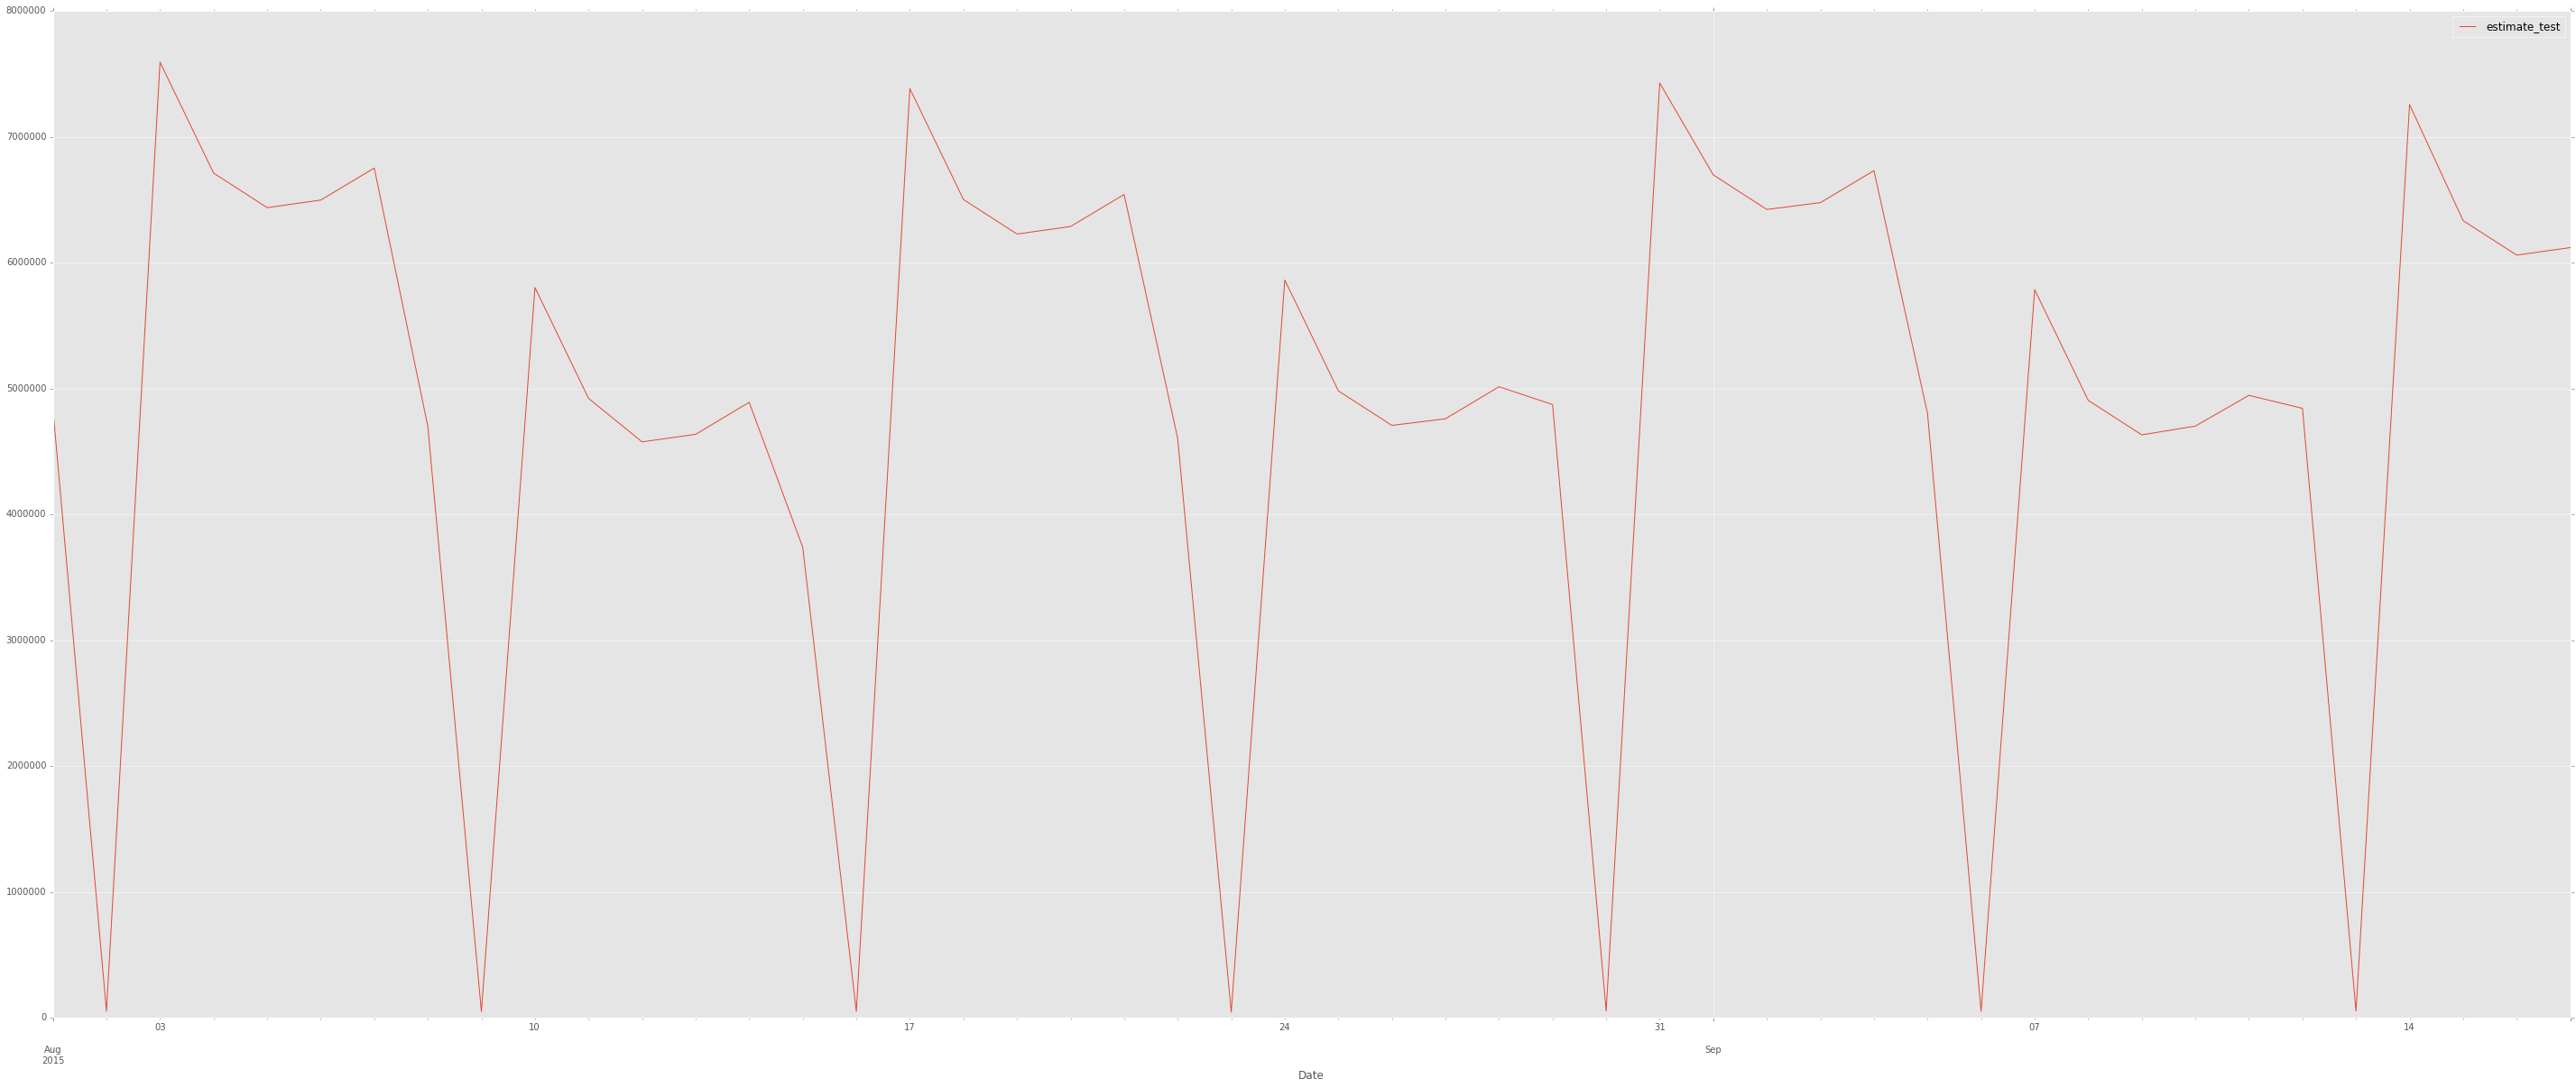

In [24]:
#aggregated_test = fitting_dataframe_test[['estimate_test']].resample('W-Mon',how='sum')

aggregated_test = fitting_dataframe_test[['estimate_test']].resample('d',how='sum')
aggregated_test.plot(figsize=(50, 20))

#y_axis_values = [theta[i,1] for i in range(1,5002,500)]  # theta wind corresponds to column one of the matrix

'''line_up, = plt.plot(x_axis_values,bornes_sup,'dk--',label='IC')     # d to add points, k: black, --: dached
plt.plot(x_axis_values,bornes_inf,'dk--')
line_down, = plt.plot(x_axis_values,wind_medians,'r',label='Med')
plt.legend(handles=[line_up, line_down],fontsize=40)
plt.xlabel('Nombre des Boostrap',fontsize=40)
plt.ylabel('Estimation de la variable Wind',fontsize=40)
plt.title('Evolution des intervalles de confiance en fonction du Booostrap',fontsize=40)
plt.show()  '''
#plt.plot(x_axis_values, bornes_sup,bornes_inf)

In [25]:
submission_file = test_data[['estimate_test']]
submission_file['estimate_test'] = submission_file.estimate_test.map(int)
submission_file.index = submission_file.index+1
submission_file.to_csv('submission.csv')
submission_file.head()

/home/khalil/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


,estimate_test
1,7132
2,7062
3,7383
4,8412
5,0


In [20]:
 # use xgboost
    
import xgboost as xgb
clf=xgb.XGBRegressor()
dtrain = xgb.DMatrix(X, label=y)
print X.shape
print y.shape
bst = xgb.train(X,y)
#gbm = xgb.XGBClassifier(max_depth=3, learning_rate=0.05).fit(X,y)
ypred = bst.predict(X_test)


(1017209, 30)
(1017209, 1)


Exception AttributeError: "'Booster' object has no attribute 'handle'" in <bound method Booster.__del__ of <xgboost.core.Booster object at 0x7f6e3efa1150>> ignored


TypeError: invalid cache item: ndarray